In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


In [2]:
from neuronbridge import client
from neuronbridge.model import *
from typing import *
client = client.Client()

id='2945073171639930891' libraryName='FlyEM_Hemibrain_v1.2.1' publishedName='636798093' imageURL='JRC2018_Unisex_20x_HR/FlyEM_Hemibrain_v1.2.1/636798093-JRC2018_Unisex_20x_HR-CDM.png' thumbnailURL='JRC2018_Unisex_20x_HR/FlyEM_Hemibrain_v1.2.1/636798093-JRC2018_Unisex_20x_HR-CDM.jpg' gender=<Gender.female: 'f'> neuronType='LHPV5c1_a' neuronInstance='LHPV5c1_a_R'


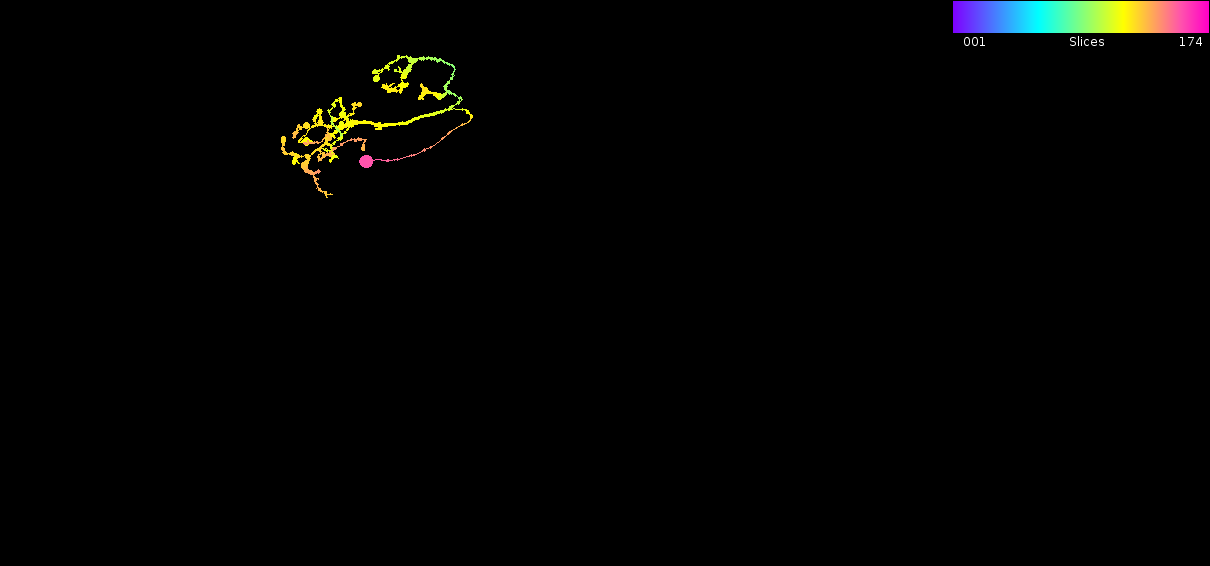

In [3]:
em_image = client.get_em_image(636798093) 
print(em_image)
client.get_cds_image(em_image)

id='2798488256180649995' libraryName='FlyLight Split-GAL4 Drivers' publishedName='LH173' imageURL='JRC2018_Unisex_20x_HR/FlyLight_Split-GAL4_Drivers/LH173-20150828_24_F1-Split_GAL4-f-63x-brain-JRC2018_Unisex_20x_HR-CDM_1.png' thumbnailURL='JRC2018_Unisex_20x_HR/FlyLight_Split-GAL4_Drivers/LH173-20150828_24_F1-Split_GAL4-f-63x-brain-JRC2018_Unisex_20x_HR-CDM_1.jpg' gender=<Gender.female: 'f'> alignmentSpace='JRC2018_Unisex_20x_HR' slideCode='20150828_24_F1' objective='63x' mountingProtocol='DPX PBS Mounting' anatomicalArea='Brain' channel='1'


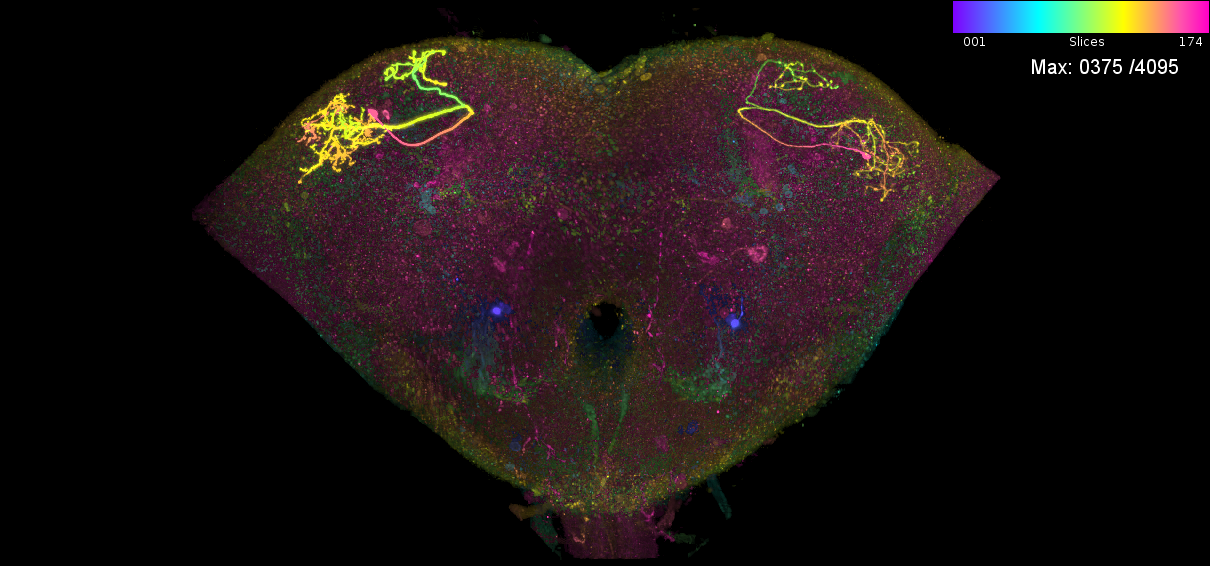

In [4]:
lm_images = client.get_lm_images('LH173')
lm_image = lm_images[0]
print(lm_image)
client.get_cds_image(lm_image)

In [5]:
from neuronbridge import utils

cds_matches = client.get_cds_matches(em_image)
ppp_matches = client.get_ppp_matches(em_image)

cds_matches.sort(key=lambda m: m.normalizedScore, reverse=True)
ppp_matches.sort(key=lambda m: m.pppRank)

print(f"CDS matches: {len(cds_matches)}")
print(f"PPP matches: {len(ppp_matches)}")

CDS matches: 10261
PPP matches: 150


In [6]:
cds_names = utils.get_published_name_set(cds_matches)
ppp_names = utils.get_published_name_set(ppp_matches)

common = cds_names.intersection(ppp_names)
list(common)[:10]


['VT048339',
 'R16C09',
 'R18C11',
 'VT002033',
 'VT059224',
 'VT028317',
 'R51H04',
 'R24H03',
 'VT023807',
 'VT029514']

In [7]:
published_names = sorted(list(common))

cds_ranks = utils.get_ranks(cds_matches, published_names)
ppp_ranks = utils.get_ranks(ppp_matches, published_names)


In [8]:
import pandas as pd
df = pd.DataFrame({'Name': published_names})
df['CDS Rank'] = df.apply(lambda row: cds_ranks[row['Name']], axis=1)
df['PPP Rank'] = df.apply(lambda row: ppp_ranks[row['Name']], axis=1)
df = df.loc[((df['CDS Rank']+df['PPP Rank'])/2.0).sort_values().index]
df

,Name,CDS Rank,PPP Rank
16,R89A01,4,7
18,VT002033,5,8
49,VT059225,2,17
28,VT023807,19,1
9,R51H04,21,5
8,R28A10,23,4
15,R74B08,8,43
51,VT063305,6,54
46,VT048350,54,6
47,VT058383,57,14


R89A01


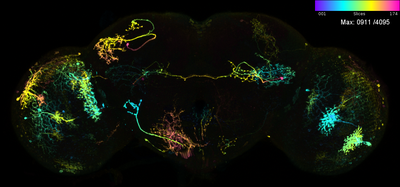

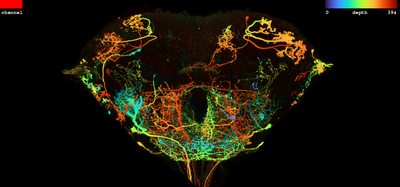

VT002033


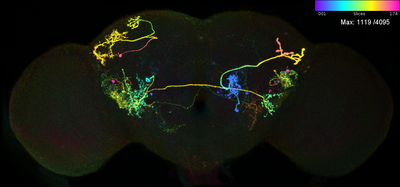

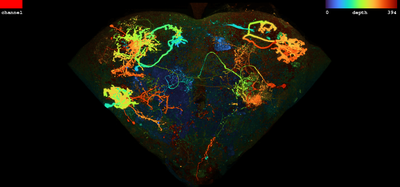

VT059225


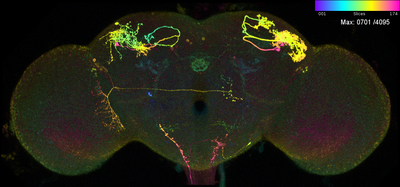

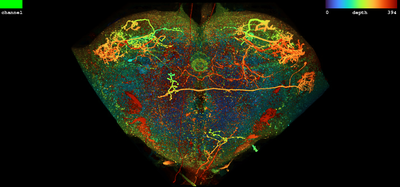

VT023807


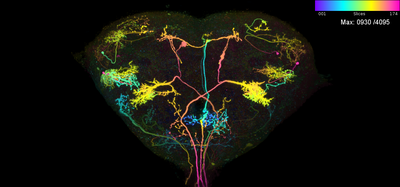

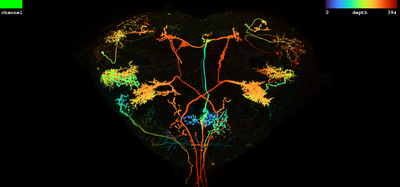

R51H04


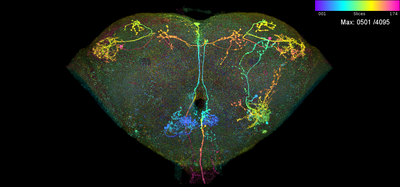

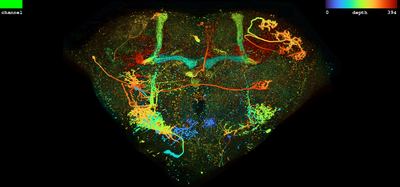

In [11]:
from IPython.display import display
from PIL.Image import Resampling
# Display top 5 lines
size = 400, 400
for name in df['Name'][:5]:
    cds_match = utils.get_first_match_for_name(cds_matches, name)
    cds_image = client.get_cds_image(cds_match)
    ppp_match = utils.get_first_match_for_name(ppp_matches, name)
    ppp_image = client.get_ppp_image(ppp_match)
    print(f"{name}")
    cds_image.thumbnail(size, Resampling.LANCZOS)
    ppp_image.thumbnail(size, Resampling.LANCZOS)
    display(cds_image, ppp_image)


id='2711776878334574603' publishedName='R16C09' libraryName='FlyLight Gen1 MCFO' alignmentSpace='JRC2018_Unisex_20x_HR' gender='f' imageStack='https://s3.amazonaws.com/janelia-flylight-imagery/Gen1+MCFO/R16C09/R16C09-20181127_62_J1-f-40x-central-GAL4-JRC2018_Unisex_20x_HR-aligned_stack.h5j' mirrored=False maskLibraryName=None imageURL='JRC2018_Unisex_20x_HR/FlyLight_Gen1_MCFO/R16C09-20181127_62_J1-GAL4-f-40x-brain-JRC2018_Unisex_20x_HR-CDM_2.png' thumbnailURL='JRC2018_Unisex_20x_HR/FlyLight_Gen1_MCFO/R16C09-20181127_62_J1-GAL4-f-40x-brain-JRC2018_Unisex_20x_HR-CDM_2.jpg' searchablePNG='R16C09-20181127_62_J1-GAL4-f-40x-brain-JRC2018_Unisex_20x_HR-CDM_2-01.png' sourceSearchablePNG='636798093-JRC2018_Unisex_20x_HR-CDM.png' normalizedScore=25000.0 matchingPixels=146 neuronType=None neuronInstance=None slideCode='20181127_62_J1' objective='40x' mountingProtocol='DPX PBS Mounting' anatomicalArea='Brain' channel='2'


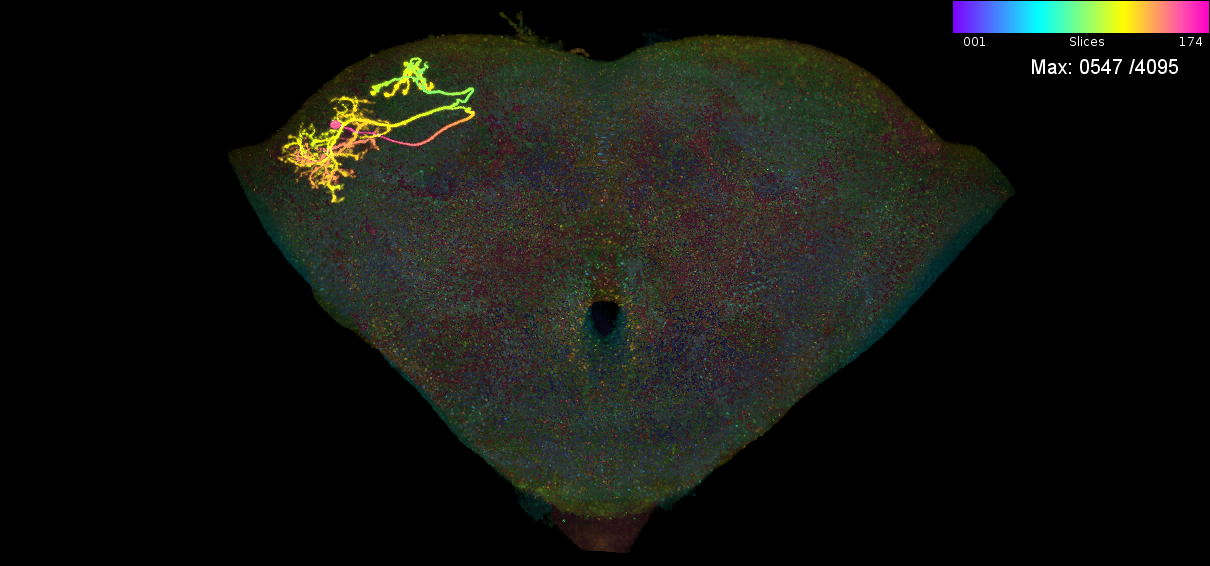

Exception: Could not retrieve https://s3.amazonaws.com/janelia-flylight-color-depth/JRC2018_Unisex_20x_HR/FlyLight_Gen1_MCFO/R16C09-20181127_62_J1-GAL4-f-40x-brain-JRC2018_Unisex_20x_HR-CDM_2-01.png

In [12]:
published_name = df['Name'][0]
cds_match = utils.get_first_match_for_name(cds_matches, published_name)
print(cds_match)
display(client.get_cds_image(cds_match))
display(client.get_match_searchable_image(cds_match))
display(client.get_target_searchable_image(cds_match))

In [ ]:
from neuronbridge import generate_schemas
generate_schemas.print_schemas()


{
  "title": "EMImageLookup",
  "description": "Top level collection returned by the EMImage lookup API.",
  "type": "object",
  "properties": {
    "results": {
      "title": "Results",
      "description": "List of EM images matching the query.",
      "type": "array",
      "items": {
        "$ref": "#/definitions/EMImage"
      }
    }
  },
  "required": [
    "results"
  ],
  "definitions": {
    "GenderEnum": {
      "title": "GenderEnum",
      "description": "An enumeration.",
      "enum": [
        "m",
        "f"
      ],
      "type": "string"
    },
    "EMImage": {
      "title": "EMImage",
      "description": "A color depth image containing a neuron body reconstructed from EM imagery.",
      "type": "object",
      "properties": {
        "id": {
          "title": "Id",
          "description": "The unique identifier for this image.",
          "type": "string"
        },
        "libraryName": {
          "title": "Libraryname",
          "description": "Name of t